#Addis Ababa Institute of Technology
School of Information Technology and Engineering
Department of Artificial Intelligence 

Reinforcement Learning

Exercise I: Introduction to Reinforcement Learning
Exercise I: Introduction to Reinforcement Learning

1. Environment:

The environment is a grid world represented by a 2D grid of size

𝑛×𝑚 (where n and m are the number of rows and columns in the grid).

Each cell in the grid can be in one of three states: empty, obstacle, or goal


In [40]:
import gymnasium as gym
import matplotlib
from utils import JupyterRender

%matplotlib inline

print(f"Gym verison: {gym.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")


Gym verison: 0.29.1
Matplotlib version: 3.6.2


* **2.Agent:**
The agent starts at a designated starting point in the grid, which is an empty cell.
The agent's goal is to navigate to the goal cell in the grid.


There are four different states in the environment:
* **S: Starting point**
* **F: Frozen land. The agent can walk on it.**
* **H: Hole. The episode is done if the agent falls into it.**
* **G: Goal. Final point. The agent can get reward (+1) if it reaches here.**

Each state is represented as current_row * 4 + current_column.

* **3.Actions:**
The agent can take one of four actions at each step: move up, down, left, or right.
The agent cannot move outside the grid or into cells containing obstacles.

And the agent can move in four directions: 
* **0: Move left**
* **1: Move down**
* **2: Move right**
* **3: Move up**




State:  0


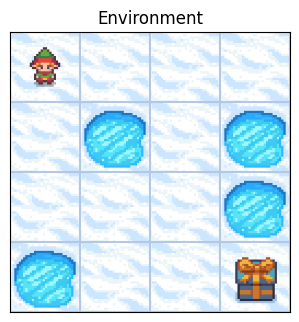

In [41]:
#define the environment.
env = gym.make("FrozenLake-v1", render_mode='rgb_array', is_slippery=False)

#FrozenLake can be 8x8.
#env = gym.make("FrozenLake-v1", map_name='8x8', render_mode='rgb_array', is_slippery=False)

#Or you can design the env as you want.
#env = gym.make("FrozenLake-v1", desc=["SFFH","FFFG"], render_mode='rgb_array', is_slippery=False)

env = JupyterRender(env)
state, _ = env.reset()#reset the environment
print("State: ", state)
env.render()




1
State: 12, Reward: 0.0, Done: True


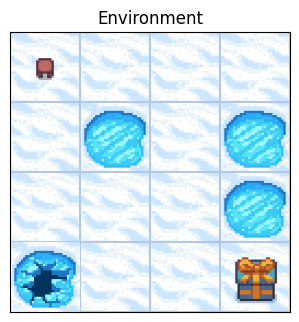

In [42]:
done = False
while not done:
    next_state, reward, done, _, _ = env.step(int(input()))## executes an action, and receive the next state, reward, done signal
    print(f"State: {next_state}, Reward: {reward}, Done: {done}")
    env.render()

## Pseudocode and Implementation of Policy Iteration

# 
Transition Dynamics:
The agent's actions deterministically move the agent in the specified direction, as long as the move is within the grid and not blocked by an obstacle.
Objective:
The agent's objective is to find the shortest path from the starting point to the goal while minimizing the total cost (or maximizing the total reward).
Starting Point and Goal:
Specify the starting point and goal point in the grid. For example:
Starting point: Cell (0, 0)
Goal point: Cell (n-1, m-1)
Define a set of obstacle cells in the grid. For example:
Obstacles: A list of cell coordinates that contain obstacles.
Initial Conditions:
The agent starts at the starting point with no prior knowledge of the environment.
The agent's initial policy and state values can be set to default values (e.g., zero).


In [ ]:
import gymnasium as gym
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from utils import JupyterRender

%matplotlib inline

In [ ]:
class Policy_Iter:
    def __init__(self, env, gamma=0.99, theta=1e-8):
        self.env = env

        self.nrow = env.nrow
        self.ncol = env.ncol 
        
        self.state_dim = env.observation_space.n # self.nrow * self.ncol
        self.action_dim = env.action_space.n

        self.gamma = gamma
        self.theta = theta
        
        # 1. Initialization
        self.pi = np.zeros([self.state_dim], dtype=int)
        self.v = np.zeros([self.state_dim])


    def run(self):
        while True:
            # 2. Policy Evaluation
            while True:
                delta = 0
                for i in range(self.state_dim):
                    v = self.v[i]

                    tmp = 0

                    for p, s_, r, done in self.env.P[i][self.pi[i]]:
                        tmp += p * (r + self.gamma * self.v[s_])

                    self.v[i] = tmp

                    delta = max(delta, abs(v - self.v[i]))

                if delta < self.theta:
                    break

            # 3. Policy Improvement
            policy_stable = True
            for i in range(self.state_dim):
                old_action = self.pi[i]

                values_by_action = []
                for j in range(self.action_dim):
                    tmp = 0
                    for p, s_, r, done in self.env.P[i][j]:
                        tmp += p * (r + self.gamma * self.v[s_])

                    values_by_action.append(tmp)

                self.pi[i] = np.argmax(values_by_action)

                if self.pi[i] != old_action:
                    policy_stable = False

            if policy_stable:
                break


In [ ]:
env = gym.make("FrozenLake-v1", render_mode='rgb_array', is_slippery=False)#define the environment.
env = JupyterRender(env)

piter_config = {
    'env': env,
    'gamma': 0.99,
    'theta': 1e-8,
}

p_iter = Policy_Iter(**piter_config)
p_iter.run()

In [ ]:
from utils.visualize import visualize_policy

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

visualize_policy(p_iter.pi, ax, p_iter.nrow, p_iter.ncol)

plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
display.display(plt.gcf())
display.clear_output(wait=True)

In [ ]:
from utils.visualize import visualize_v

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

visualize_v(p_iter.v, ax, p_iter.nrow, p_iter.ncol)

plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
display.display(plt.gcf())
display.clear_output(wait=True)


# Pseudocode and Implementation of Value Iteration
Value iteration
However, policy iteration holds drawbacks such as large required computation power for policy evaluation, and its difficulty of converging to optimal value function in all states. Even more, optimal value function may not be required for achievement of optimal policy. Inspired from it, **Value iteration** combines policy evaluation and improvement by using the Bellman optimality equation. 

In [ ]:
import gymnasium as gym
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from utils import JupyterRender

%matplotlib inline

In [ ]:
class Value_Iter:
    def __init__(self, env, gamma=0.99, theta=1e-8):
        self.env = env

        self.nrow = env.nrow
        self.ncol = env.ncol
        
        self.state_dim = env.observation_space.n
        self.action_dim = env.action_space.n
        
        self.gamma = gamma
        self.theta = theta
        
        # 1. Initialization
        self.v = np.zeros([self.state_dim])
        self.pi = np.zeros([self.state_dim], dtype=int)

    def run(self):
        while True:
            delta = 0.
            for i in range(self.state_dim):
                current_v = self.v[i]

                values_by_action = []
                for j in range(self.action_dim):
                    tmp = 0
                    for p, s_, r, done in self.env.P[i][j]:
                        tmp += p * (r + self.gamma * self.v[s_])

                    values_by_action.append(tmp)
                self.v[i] = max(values_by_action)

                delta = max(delta, abs(self.v[i] - current_v))
            if delta < self.theta:
                break

        for i in range(self.state_dim):
            values_by_action = []
            for j in range(self.action_dim):
                tmp = 0
                for p, s_, r, done in self.env.P[i][j]:
                    tmp += p * (r + self.gamma * self.v[s_])

                values_by_action.append(tmp)

            self.pi[i] = np.argmax(values_by_action)


In [ ]:
env = gym.make("FrozenLake-v1", render_mode='rgb_array', is_slippery=False)#define the environment.
env = JupyterRender(env)

viter_config = {
    'env': env,
    'gamma': 0.99,
    'theta': 1e-8,
}

v_iter = Value_Iter(**viter_config)
v_iter.run()

In [ ]:
from utils.visualize import visualize_policy

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

visualize_policy(v_iter.pi, ax, v_iter.nrow, v_iter.ncol)

plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
display.display(plt.gcf())
display.clear_output(wait=True)

# Pseudocode and Implementation of Q-learning

In [43]:
import gymnasium as gym
import numpy as np
from utils import JupyterRender

%matplotlib inline

In [44]:
# Q-learning in FrozenLake


class Q_learning:
    def __init__(self, env, gamma=0.8, alpha=0.1, eps=0.1, render=False, max_episode=1000):
        self.state_dim = env.observation_space.n
        self.action_dim = env.action_space.n
        
        self.env = env
                
        self.nrow = env.nrow
        self.ncol = env.ncol 
        
        self.alpha = alpha
        self.gamma = gamma
        self.eps = eps
        self.render = render
        self.max_episode = max_episode

        self.q = np.zeros([self.state_dim, self.action_dim])

    def action(self, s):
        if np.random.random() < self.eps:
            action = np.random.randint(low=0, high=self.action_dim - 1)
        else:
            action = np.argmax(self.q[s,:])

        return action

    def run(self):
        self.success = 0

        for episode in range(self.max_episode):
            observation, _ = env.reset()
            done = False
            episode_reward = 0
            local_step = 0

            while not done:

                action = self.action(observation)
                next_observation, reward, done, _, _ = self.env.step(action)
                
                if self.render:
                    self.env.render(title=f"Episode {episode} / step {local_step}", q=self.q)
                # give penalty for staying in ground
                if reward == 0:
                    reward = -0.001
                    
                # give penalty for falling into the hole
                if done and next_observation != 15:
                    reward = -1

                if local_step == 100:
                    done = True #prevent infinite episode
                    reward = -1

                if observation == next_observation: # prevent meaningless actions
                    reward = -1


                # q-learning update
                self.q[observation, action] = self.q[observation, action] + self.alpha*(reward + self.gamma*np.max(self.q[next_observation,:]) - self.q[observation, action])
                
                observation = next_observation
                episode_reward += reward
                local_step += 1

            #print("Episode: {}, Step: {}, Episode_reward: {}".format(episode, local_step, episode_reward))
            
            if observation == 15:
                self.success += 1

In [45]:
env = gym.make("FrozenLake-v1", render_mode='rgb_array', is_slippery=False)#define the environment.
env = JupyterRender(env)

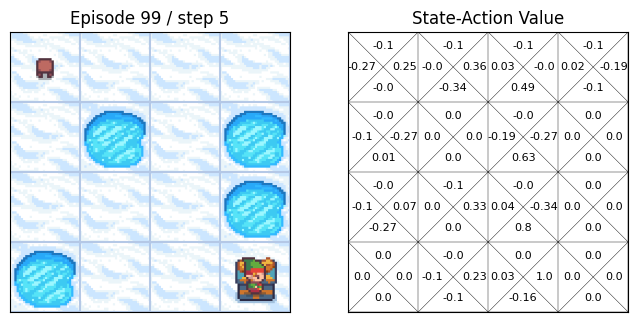

In [46]:
q_config = {
    'env': env,
    'gamma': 0.8,
    'alpha': 0.1,
    'eps': 0.1,
    'render': True,
    'max_episode': 100
}

q_learning = Q_learning(**q_config)
q_learning.run()

In [52]:
import gymnasium as gym
import numpy as np
from utils import JupyterRender

%matplotlib inline
# Q-learning in FrozenLake with Epsilon-Greedy Policy


class Q_learning:
  def __init__(self, env, gamma=0.8, alpha=0.1, eps=0.1, render=False, max_episode=1000):
    self.state_dim = env.observation_space.n
    self.action_dim = env.action_space.n

    self.env = env

    self.nrow = env.nrow
    self.ncol = env.ncol

    self.alpha = alpha
    self.gamma = gamma
    self.eps = eps  # Epsilon for exploration-exploitation trade-off
    self.render = render
    self.max_episode = max_episode

    self.q = np.zeros([self.state_dim, self.action_dim])

  def action(self, s):
    if np.random.random() < self.eps:
      # Explore: Choose a random action
      action = np.random.randint(low=0, high=self.action_dim - 1)
    else:
      # Exploit: Choose the action with the highest Q-value
      action = np.argmax(self.q[s, :])

    return action

  def run(self):
    self.success = 0

    for episode in range(self.max_episode):
      observation, _ = env.reset()
      done = False
      episode_reward = 0
      local_step = 0

      while not done:

        action = self.action(observation)
        next_observation, reward, done, _, _ = self.env.step(action)

        if self.render:
          self.env.render(title=f"Episode {episode} / step {local_step}", q=self.q)

        # Give penalty for staying in ground
        if reward == 0:
          reward = -0.001

        # Give penalty for falling into the hole
        if done and next_observation != 15:
          reward = -1

        if local_step == 100:
          done = True  # Prevent infinite episode
          reward = -1

        if observation == next_observation:  # Prevent meaningless actions
          reward = -1

        # Q-learning update with Epsilon-Greedy incorporated
        self.q[observation, action] = self.q[observation, action] + self.alpha * (
            reward + self.gamma * np.max(self.q[next_observation, :]) - self.q[observation, action])

        observation = next_observation
        episode_reward += reward
        local_step += 1

#print("Episode: {}, Step: {}, Episode_reward: {}".format(episode, local_step, episode_reward))
            
        if observation == 15:
            self.success += 1

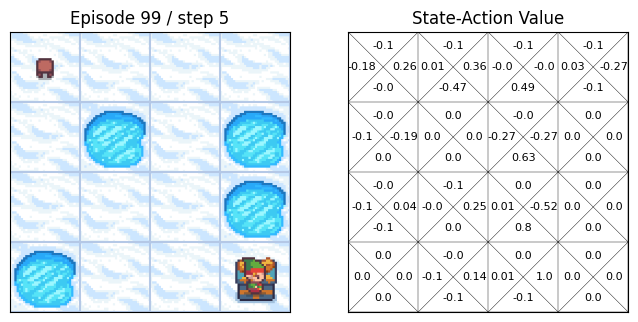

In [53]:
env = gym.make("FrozenLake-v1", render_mode='rgb_array', is_slippery=False)#define the environment.
env = JupyterRender(env)
q_config = {
    'env': env,
    'gamma': 0.8,
    'alpha': 0.1,
    'eps': 0.1,
    'render': True,
    'max_episode': 100
}

q_learning = Q_learning(**q_config)
q_learning.run()

# Apply the Upper Confidence Bound (UCB)


In [54]:
import gymnasium as gym
import numpy as np
from utils import JupyterRender

%matplotlib inline
# Q-learning in FrozenLake with UCB


class Q_learning:
  def __init__(self, env, gamma=0.8, alpha=0.1, c=1.0, render=False, max_episode=1000):
    self.state_dim = env.observation_space.n
    self.action_dim = env.action_space.n

    self.env = env

    self.nrow = env.nrow
    self.ncol = env.ncol

    self.alpha = alpha
    self.gamma = gamma
    self.c = c  # Constant for UCB calculation
    self.render = render
    self.max_episode = max_episode

    self.q = np.zeros([self.state_dim, self.action_dim])
    self.visit_count = np.zeros([self.state_dim, self.action_dim])  # Track visit counts for each state-action pair

  def action(self, s):
    # UCB calculation (consider adding a small epsilon to avoid 0 in denominator)
    ucb_values = self.q[s, :] + self.c * np.sqrt(np.log(np.sum(self.visit_count)) / (self.visit_count[s, :] + 1e-8))
    action = np.argmax(ucb_values)
    return action

  def run(self):
    self.success = 0

    for episode in range(self.max_episode):
      observation, _ = env.reset()
      done = False
      episode_reward = 0
      local_step = 0

      while not done:

        action = self.action(observation)
        next_observation, reward, done, _, _ = self.env.step(action)

        if self.render:
          self.env.render(title=f"Episode {episode} / step {local_step}", q=self.q)

        # Give penalty for staying in ground
        if reward == 0:
          reward = -0.001

        # Give penalty for falling into the hole
        if done and next_observation != 15:
          reward = -1

        if local_step == 100:
          done = True  # Prevent infinite episode
          reward = -1

        if observation == next_observation:  # Prevent meaningless actions
          reward = -1

        # Q-learning update (remains the same)
        self.q[observation, action] = self.q[observation, action] + self.alpha * (
            reward + self.gamma * np.max(self.q[next_observation, :]) - self.q[observation, action])

        # Update visit count for chosen state-action pair
        self.visit_count[observation, action] += 1

        observation = next_observation
        episode_reward += reward
        local_step += 1

#print("Episode: {}, Step: {}, Episode_reward: {}".format(episode, local_step, episode_reward))
            
        if observation == 15:
            self.success += 1


In [ ]:
env = gym.make("FrozenLake-v1", render_mode='rgb_array', is_slippery=False)#define the environment.
env = JupyterRender(env)
q_config = {
    'env': env,
    'gamma': 0.8,
    'alpha': 0.1,
    'eps': 0.1,
    'render': True,
    'max_episode': 100
}

q_learning = Q_learning(**q_config)
q_learning.run()